In [1]:
from pvd import PVD, ReversePVD
from ipvd import IPVD, ReverseIPVD
from lsb import LSB, ReverseLSB
from range_table import RangeTables
from bitarray import bitarray
from bitpacker import packSecrets, unpackSecrets
from PIL import Image
from matplotlib import pyplot as plt

In [7]:
image = LSB('images/image.png')
secret = packSecrets('./secrets')
result, new_data = image.hide_data(secret, 3, 'results/lsb_image1.png')
image.print_capacity()

reverse = ReverseLSB('results/lsb_image1.png')
extracted = reverse.extract(3)
unpackSecrets(extracted)

image = LSB('images/image2.jpg')
secret = packSecrets('./secrets2')
result, new_data = image.hide_data(secret, 3, 'results/lsb_image2.png')
image.print_capacity()

reverse = ReverseLSB('results/lsb_image2.png')
extracted = reverse.extract(3)
unpackSecrets(extracted, out='./result_secrets2')

Calculated capacity: 
 =3950820 b
 ~482 KB
Calculated capacity: 
 =6097920 b
 ~744 KB


In [4]:
image = PVD('images/image.png')
secret = packSecrets('./secrets')
result, new_data = image.hide_data(secret, RangeTables.basic_range_table, 'results/pvd_image1.png')
image.print_capacity()

reverse = ReversePVD('results/pvd_image1.png')
extracted = reverse.extract(RangeTables.basic_range_table)
unpackSecrets(extracted)

image = PVD('images/image2.jpg')
secret = packSecrets('./secrets2')
result, new_data = image.hide_data(secret, RangeTables.basic_range_table, 'results/pvd_image2.png')
image.print_capacity()

reverse = ReversePVD('results/pvd_image2.png')
extracted = reverse.extract(RangeTables.basic_range_table)
unpackSecrets(extracted, out='./result_secrets2')

Calculated capacity: 
 =2208414 b
 ~269 KB
Calculated capacity: 
 =3151783 b
 ~384 KB


In [4]:
image = IPVD('images/image.png')
secret = packSecrets('./secrets')
result, new_data = image.hide_data(secret, RangeTables.basic_range_table, 2, 'results/ipvd_image1.png')
image.print_capacity()

reverse = ReverseIPVD('results/ipvd_image1.png')
extracted = reverse.extract(RangeTables.basic_range_table, 2)
unpackSecrets(extracted)

image = IPVD('images/image2.jpg')
secret = packSecrets('./secrets2')
result, new_data = image.hide_data(secret, RangeTables.basic_range_table, 2, 'results/ipvd_image2.png')
image.print_capacity()

reverse = ReverseIPVD('results/ipvd_image2.png')
extracted = reverse.extract(RangeTables.basic_range_table, 2)
unpackSecrets(extracted, out='./result_secrets2')

Calculated capacity: 
 =2400293 b
 ~293 KB
Calculated capacity: 
 =3489229 b
 ~425 KB


In [5]:
def hist_plot(image_path):
    hist = Image.open(image_path).convert('RGBA').histogram()
    hist_r = hist[:256]
    hist_g = hist[256:256*2]
    hist_b = hist[256*2:256*3]
    hist_a = hist[256*3:]

    fig, ax = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(20, 5)
    ax: list[plt.Axes]
    ax[0].bar(range(256), hist_r, color=(1, 0, 0))
    ax[1].bar(range(256), hist_g, color=(0, 1, 0))
    ax[2].bar(range(256), hist_b, color=(0, 0, 1))
    return fig, ax

# def comparison_hist_plot(image_path1, image_path2):
#     hist1 = Image.open(image_path1).convert('RGBA').histogram()
#     hist2 = Image.open(image_path2).convert('RGBA').histogram()
#     hist_diff = [ abs(hist1[i] - hist2[i]) for i in range(len(hist1)) ]
#     hist_r = hist_diff[:256]
#     hist_g = hist_diff[256:256*2]
#     hist_b = hist_diff[256*2:256*3]
#     hist_a = hist_diff[256*3:]

#     fig, ax = plt.subplots(1, 3, sharey=True)
#     fig.set_size_inches(20, 5)
#     ax: list[plt.Axes]
#     ax[0].bar(range(256), hist_r, color=(1, 0, 0))
#     ax[1].bar(range(256), hist_g, color=(0, 1, 0))
#     ax[2].bar(range(256), hist_b, color=(0, 0, 1))
#     return fig, ax

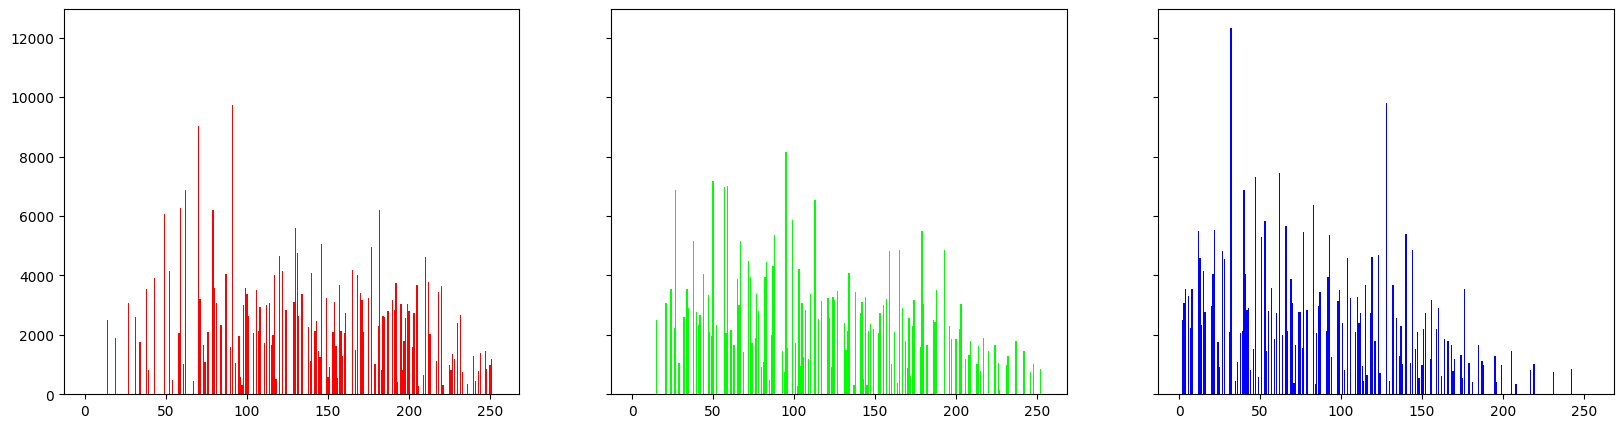

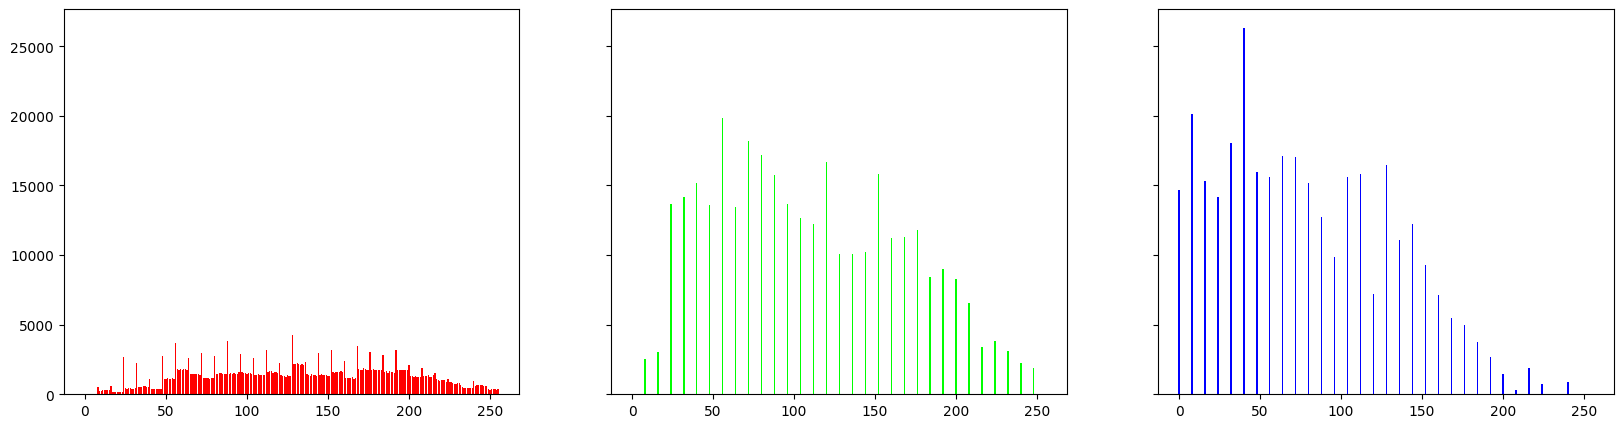

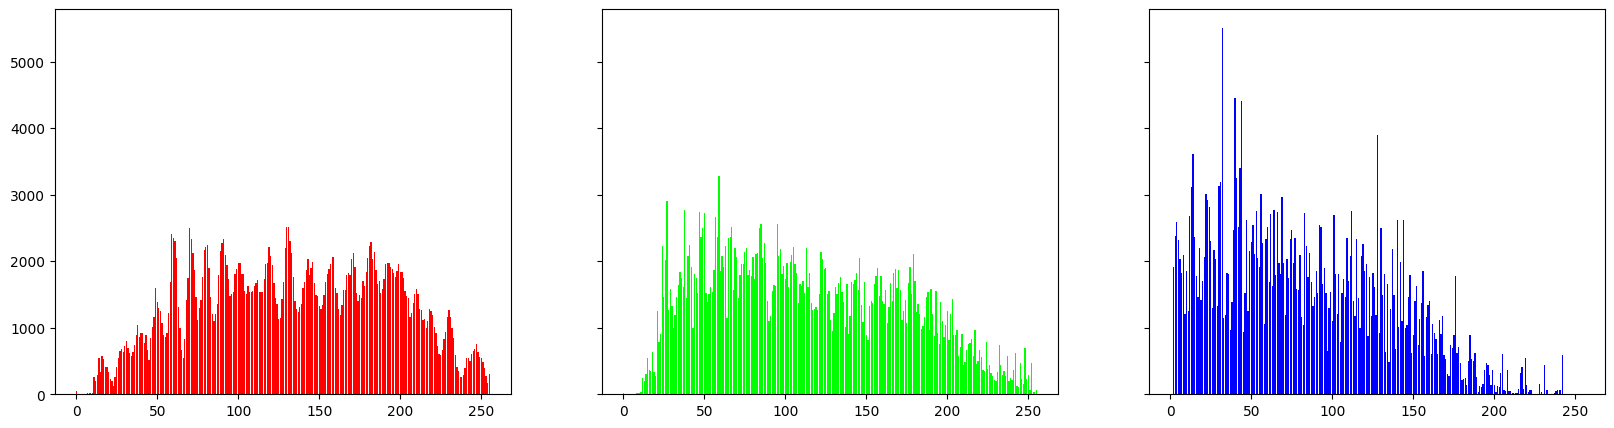

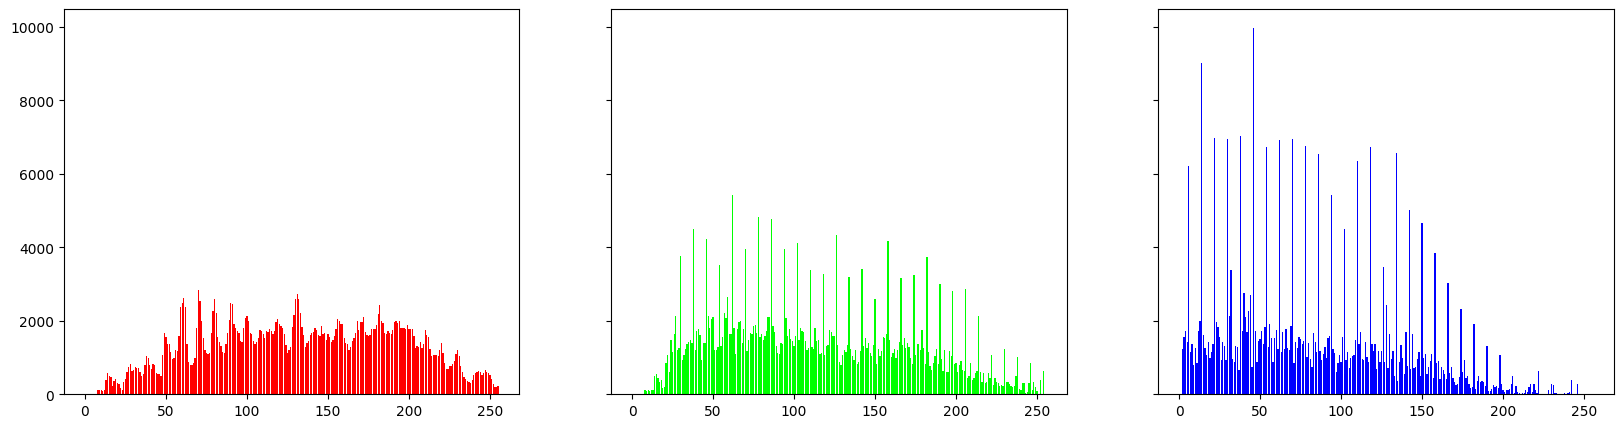

In [7]:
fig1, ax1 = hist_plot('images/image.png')
fig2, ax2 = hist_plot('results/lsb_image1.png')
# fig2_comp, ax2_comp = comparison_hist_plot('images/image.png', 'results/lsb_image.png')
fig3, ax3 = hist_plot('results/pvd_image1.png')
# fig3_comp, ax3_comp = comparison_hist_plot('images/image.png', 'results/pvd_image.png')
fig4, ax4 = hist_plot('results/ipvd_image1.png')
# fig4_comp, ax4_comp = comparison_hist_plot('images/image.png', 'results/ipvd_image.png')

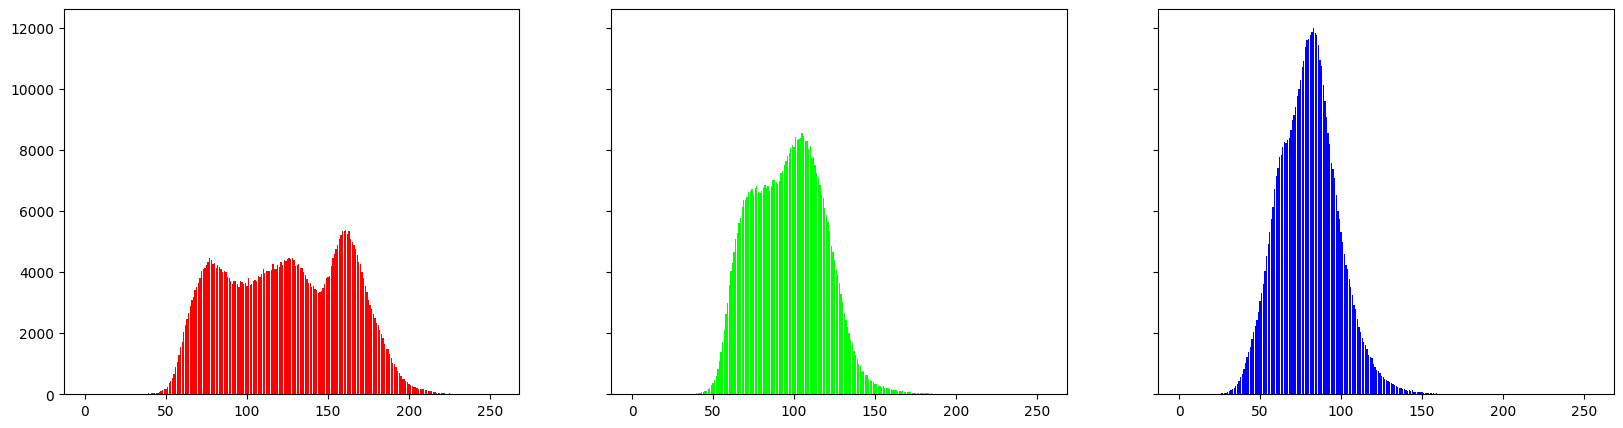

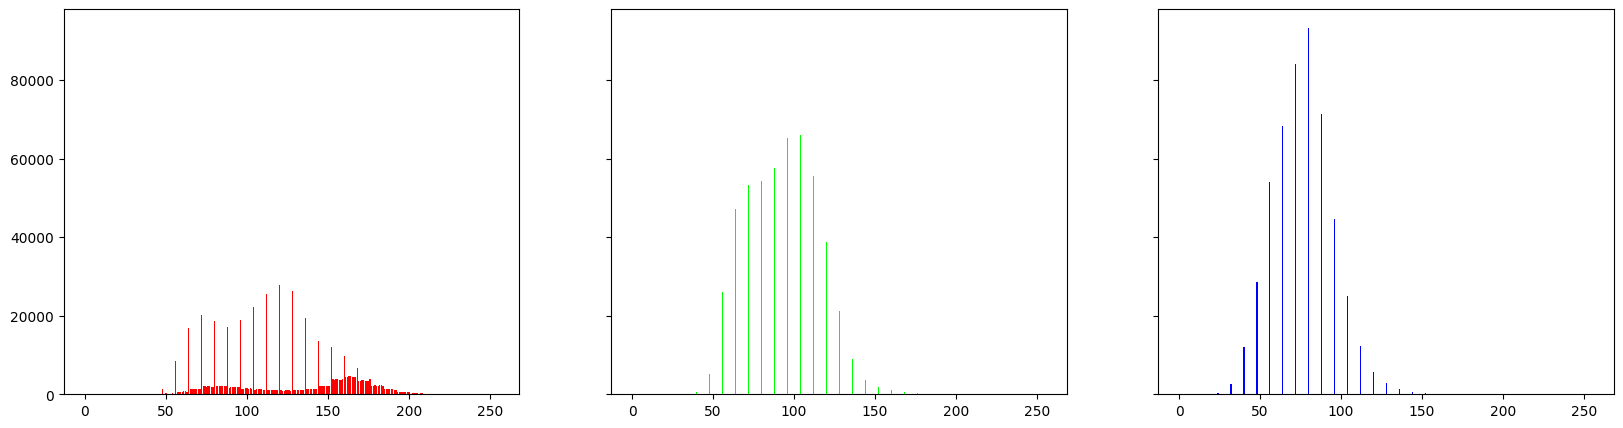

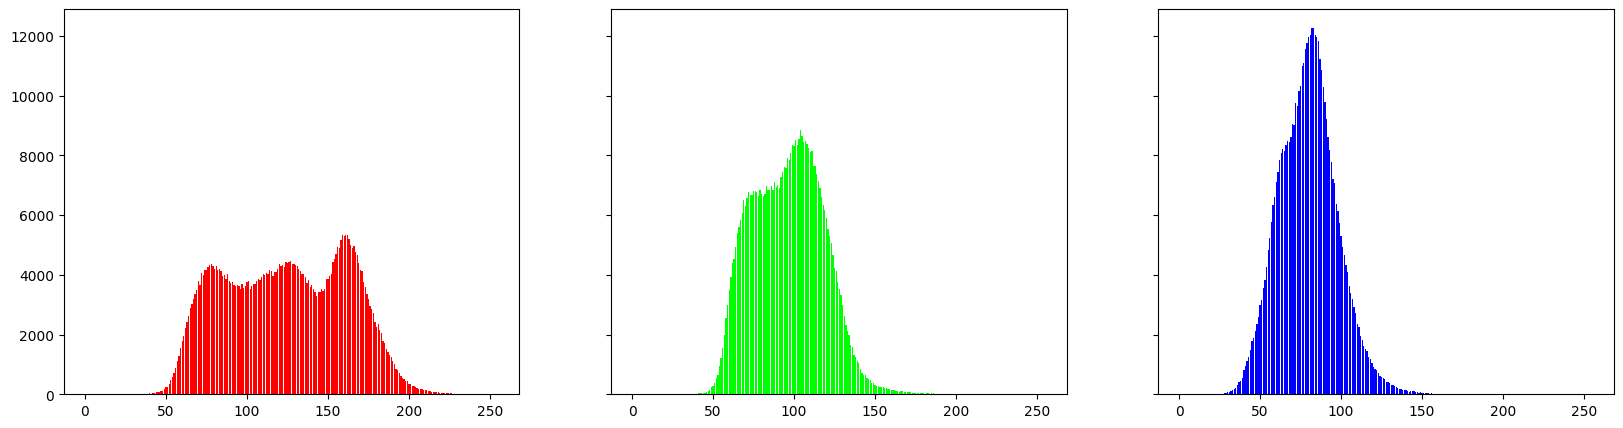

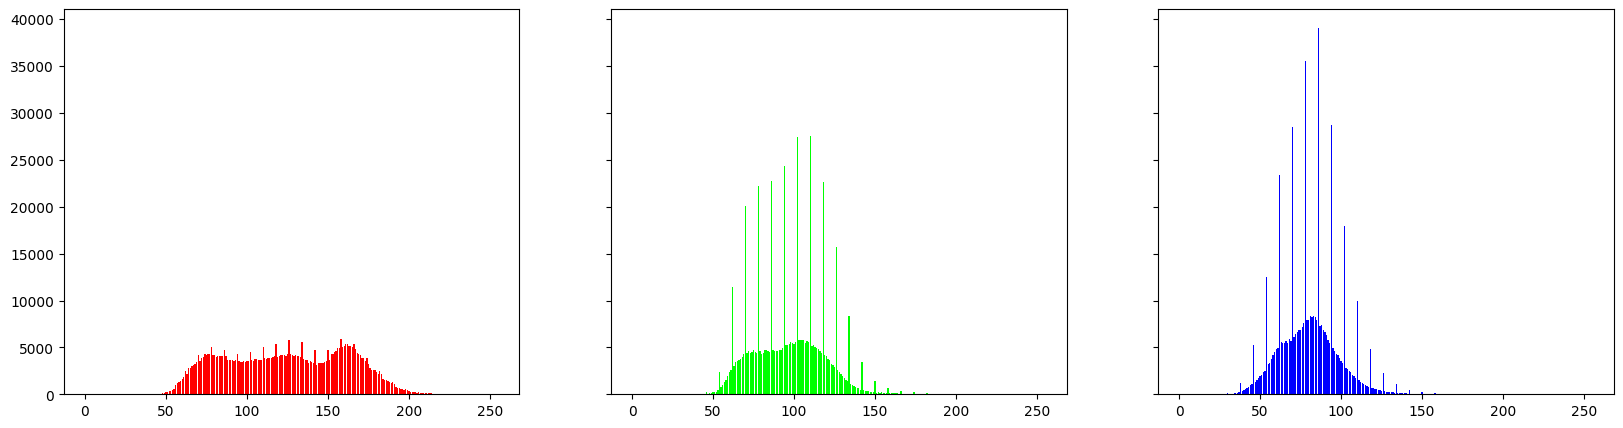

In [9]:
fig1, ax1 = hist_plot('images/image2.jpg')
fig2, ax2 = hist_plot('results/lsb_image2.png')
# fig2_comp, ax2_comp = comparison_hist_plot('images/image.png', 'results/lsb_image.png')
fig3, ax3 = hist_plot('results/pvd_image2.png')
# fig3_comp, ax3_comp = comparison_hist_plot('images/image.png', 'results/pvd_image.png')
fig4, ax4 = hist_plot('results/ipvd_image2.png')
# fig4_comp, ax4_comp = comparison_hist_plot('images/image.png', 'results/ipvd_image.png')